In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('dirty_cafe_sales.csv')
df_clean = df.copy()

In [83]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [84]:
df_clean.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [85]:
df_clean['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [86]:
df_clean['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [87]:
df_clean['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR'], dtype=object)

Заменяем UNKNOWN и ERROR на неизветсные значения nan, чтобы потом можно быдо их заменить при помощи встроенных методов 

In [88]:
df_clean.replace(['UNKNOWN', 'ERROR'], np.nan, inplace=True)

In [89]:
df_clean.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,NaN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [90]:
(df_clean == "ERROR").sum()
(df_clean == "UNKNOWN").sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [91]:
df_clean.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

Приводим к типам

In [92]:
df_clean['Quantity'] = df_clean['Quantity'].astype('float64')
df_clean['Price Per Unit'] = df_clean['Price Per Unit'].astype('float64')
df_clean['Total Spent'] = df_clean['Total Spent'].astype('float64')

In [93]:
df_clean['Item'] = df_clean['Item'].astype('category')
df_clean['Location'] = df_clean['Location'].astype('category')
df_clean['Payment Method'] = df_clean['Payment Method'].astype('category')

In [94]:
df_clean['Transaction Date'] = df_clean['Transaction Date'].astype('datetime64[ns]')

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   category      
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   category      
 6   Location          6039 non-null   category      
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 420.7+ KB


Замена пропущенных значений

In [96]:
df_clean['Quantity'].fillna(value=df_clean['Quantity'].median(), inplace=True)
df_clean['Price Per Unit'].fillna(value=df_clean['Price Per Unit'].median(), inplace=True)
df_clean['Total Spent'].fillna(value=df_clean['Total Spent'].median(), inplace=True)

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\1912156632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Quantity'].fillna(value=df_clean['Quantity'].median(), inplace=True)
C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\1912156632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [97]:
df_clean['Item'].fillna(df_clean['Item'].mode()[0], inplace=True)
df_clean['Payment Method'].fillna(df_clean['Payment Method'].mode()[0], inplace=True)
df_clean['Location'].fillna(df_clean['Location'].mode()[0], inplace=True)

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\287099432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Item'].fillna(df_clean['Item'].mode()[0], inplace=True)
C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\287099432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [98]:
df_clean['Transaction Date'].ffill(inplace=True)

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\2211165137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Transaction Date'].ffill(inplace=True)


In [99]:
df_clean.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31
6,TXN_4433211,Juice,3.0,3.0,9.0,Digital Wallet,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Takeaway,2023-10-28
8,TXN_4717867,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Digital Wallet,In-store,2023-12-31


Feature Engineering

In [100]:
month = df_clean['Transaction Date'].dt.month_name()

In [101]:
df_clean.insert(loc=len(df_clean.columns), column='Transaction month', value=month)

In [102]:
df = df_clean
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Transaction month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,May
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19,July
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,April
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,June
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30,August
9996,TXN_9659401,Juice,3.0,3.0,3.0,Digital Wallet,Takeaway,2023-06-02,June
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02,March
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,Takeaway,2023-12-02,December


In [103]:
#df.to_csv(path_or_buf='C:/Study/Data_Cleaning+EDA/cleaning_cafe_sales.csv')

EDA

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     10000 non-null  object        
 1   Item               10000 non-null  category      
 2   Quantity           10000 non-null  float64       
 3   Price Per Unit     10000 non-null  float64       
 4   Total Spent        10000 non-null  float64       
 5   Payment Method     10000 non-null  category      
 6   Location           10000 non-null  category      
 7   Transaction Date   10000 non-null  datetime64[ns]
 8   Transaction month  10000 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(3), object(2)
memory usage: 498.8+ KB


In [105]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,10000.000000,10000.00000,10000.00000,10000
mean,3.027100,2.95265,8.87795,2023-07-02 00:30:31.680000256
min,1.000000,1.00000,1.00000,2023-01-01 00:00:00
25%,2.000000,2.00000,4.00000,2023-04-01 00:00:00
50%,3.000000,3.00000,8.00000,2023-07-02 00:00:00
75%,4.000000,4.00000,12.00000,2023-10-02 00:00:00
max,5.000000,5.00000,25.00000,2023-12-31 00:00:00
std,1.384614,1.24396,5.86059,NaN


In [106]:
df['Item'].value_counts()

Item
Juice       2140
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

In [107]:
df['Location'].value_counts()

Location
Takeaway    6983
In-store    3017
Name: count, dtype: int64

In [108]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    5469
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [109]:
df['Transaction month'].value_counts()

Transaction month
October      887
March        873
June         855
January      852
August       844
December     840
July         827
November     819
September    814
April        812
May          810
February     767
Name: count, dtype: int64

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\1994618505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item', data=df, palette='colorblind')


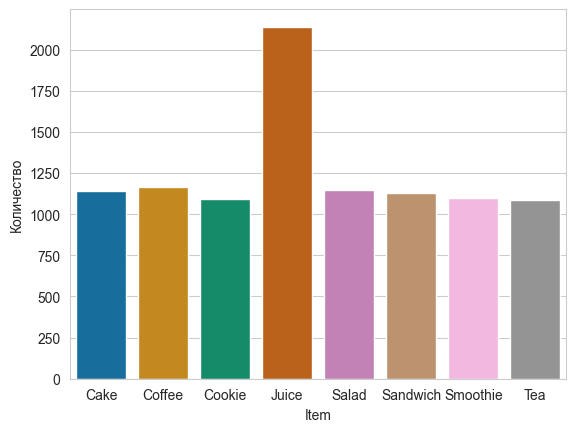

In [113]:
sns.set_style('whitegrid')
sns.countplot(x='Item', data=df, palette='colorblind')
plt.xlabel('Item')
plt.ylabel('Количество')
plt.show()

<Axes: >

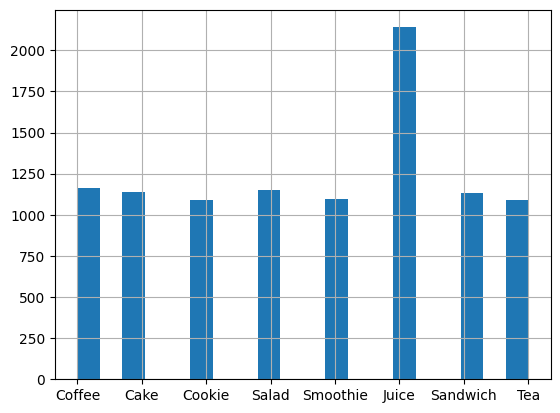

In [110]:
df['Item'].hist(bins=20)

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\114031547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=df, palette='colorblind')


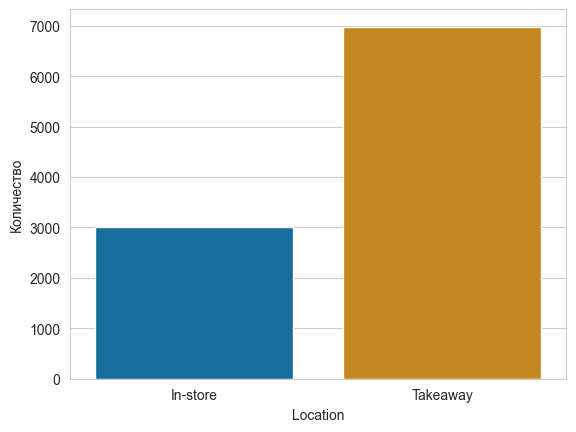

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Location', data=df, palette='colorblind')
plt.xlabel('Location')
plt.ylabel('Количество')
plt.show()

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\3938264245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=df, palette='colorblind')


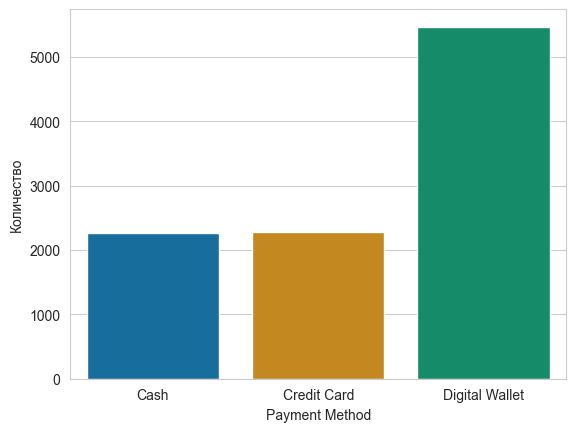

In [116]:
sns.set_style('whitegrid')
sns.countplot(x='Payment Method', data=df, palette='colorblind')
plt.xlabel('Payment Method')
plt.ylabel('Количество')
plt.show()

C:\Users\dimam\AppData\Local\Temp\ipykernel_8636\642650448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transaction month', data=df, palette='colorblind')


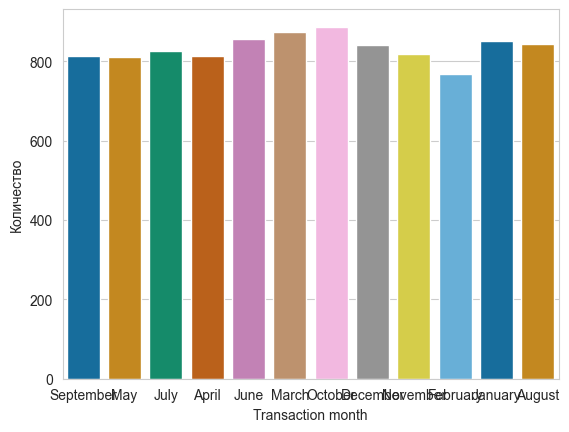

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='Transaction month', data=df, palette='colorblind')
plt.xlabel('Transaction month')
plt.ylabel('Количество')
plt.show()

<Axes: ylabel='Transaction month'>

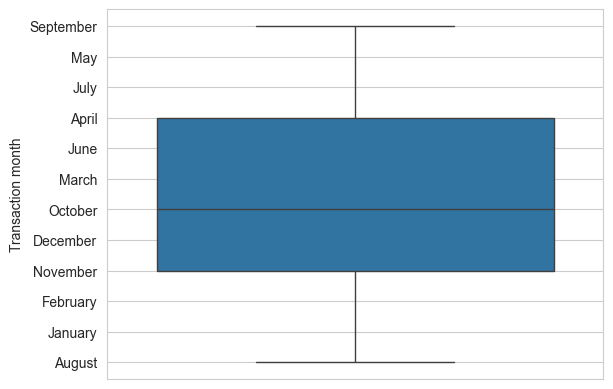

In [118]:
sns.boxplot(df['Transaction month'])

<Axes: ylabel='Total Spent'>

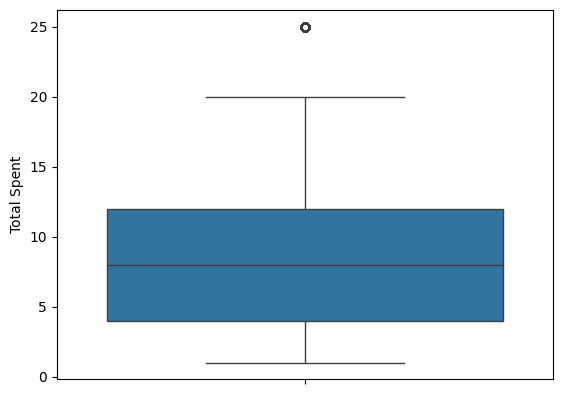

In [112]:
sns.boxplot(df['Total Spent'])